Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


a.    **Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

Ans : 
From the below performed analysis I can conclude that in the dataset provided there is presence of outliers. Due to theses outliers the calculations result into a wrong output.
The Average Order value can be derived for two different types of order.
- B2B [Business to Business] Having the value in thousands
- B2C [Business to Customer] Having the value in hundreds

Thus if we can calculate the AOV separetly for the required class i.e. B2B or B2C. ( Here B2C )

***The correct AOV as per below calculations = $357.92***

**b.	What metric would you report for this dataset?**

Ans : To protect our evaluation metric from the effects of extreme/erroneous points it would be wise to use a robust evaluation metric: median.


**c.	What is its value?**

Ans : The median is 284, which is a more reasonable value for our measure of central tendancy than the mean (3145.13) given that we are talking about single-transaction purchases of shoes.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Shopify.csv')

In [2]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
print('Dates between: ' + min(df['created_at'])[0:10] + ' and ' + max(df['created_at'])[0:10] )

Dates between: 2017-03-01 and 2017-03-30


In [10]:
AOV=df['order_amount'].sum() / len(df)

print('The metric calculated incorrectly was defined as the total order values divided by the dataframe number of rows.\n So the average order value (AOV) was calculated equals to ${0:.2f}'.format(AOV))

The metric calculated incorrectly was defined as the total order values divided by the dataframe number of rows.
 So the average order value (AOV) was calculated equals to $3145.13


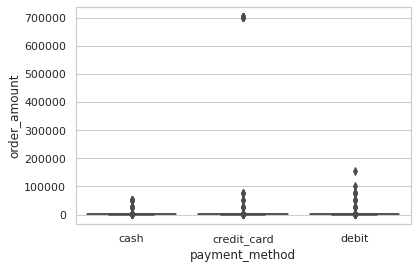

In [11]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["payment_method"], y=df["order_amount"])

In [12]:
avgPrice = df['order_amount'].sum() / df['total_items'].sum()

print('The metric that should be reported for this dataset is  is to sum all orders amount and divide by\
 the number of items in the order.\nThe correct values is equals to  ${0:.2f}'.format(avgPrice))

The metric that should be reported for this dataset is  is to sum all orders amount and divide by the number of items in the order.
The correct values is equals to  $357.92


In [13]:
a=df.groupby("user_id", as_index=False)[["total_items", "order_amount"]].sum()
a['avg_order'] = a['order_amount']/ a['total_items']
a.sort_values(['avg_order'], ascending=False).head()

,user_id,total_items,order_amount,avg_order
179,878,24,156936,6539.000000
67,766,23,80076,3481.565217
263,962,24,80408,3350.333333
156,855,27,80915,2996.851852
76,775,28,81114,2896.928571


In [14]:
b=df.groupby("shop_id", as_index=False)[["order_amount", "total_items"]].sum()
b['avg_order'] = b['order_amount'] / b['total_items']
b.sort_values(['avg_order'], ascending=False).head()

,shop_id,order_amount,total_items,avg_order
77,78,2263800,88,25725.0
41,42,11990176,34063,352.0
11,12,18693,93,201.0
88,89,23128,118,196.0
98,99,18330,94,195.0


**Question 2 Answers**


**Question 2a**

*Answer: 54*


SELECT COUNT(*)
FROM Orders AS o, Shippers AS s
WHERE o.ShipperId = s.ShipperId AND ShipperName = "Speedy Express";



**Question 2b**

*Answer: Handel (10 orders)*

SELECT c.CustomerName, COUNT(*) AS Count
FROM Orders AS o, Customers AS c
WHERE o.CustomerID = c.CustomerID
GROUP BY o.CustomerID
ORDER BY Count DESC
LIMIT 1;



**Question 2c**

*Answer: Boston Crab Meat (ProductID: 40, TotalQuantity: 160)*

SELECT p.ProductID, p.ProductName, SUM(Quantity) AS TotalQuantity
FROM Orders AS o, OrderDetails AS od, Customers AS c, Products AS p
WHERE c.Country = "Germany" AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND c.CustomerID = o.CustomerID
GROUP BY p.ProductID
ORDER BY TotalQuantity DESC
LIMIT 1;